In [1]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_treino = pd.read_csv("train.csv")

In [3]:
#Visualizando as 5 primeiras linhas
df_treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Dicionário das variáveis

### PassengerId: Passageiro ID
### Survived: Sobreviveu
### Pclass: Classe do ingresso
### Name: Nome
### Sex: Sexo
### Age: Idade
### SibSp: Nº de irmãos / cônjuges a bordo do Titanic
### Parch: Nº de pais / filhos a bordo do Titanic
### Ticket: Número do bilhete
### Fare: Tarifa de passageiro
### Cabin: Número da cabine
### Embarked: Porto de embarcação


In [4]:
#Total de linhas e colunas do conjunto de dados
df_treino.shape

(891, 12)

In [5]:
df_treino.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
mulheres = df_treino.loc[df_treino.Sex == 'female']["Survived"]
taxa_mulheres = sum(mulheres)/len(mulheres)

In [7]:
print("% de mulheres que sobreviveram:", taxa_mulheres)

% de mulheres que sobreviveram: 0.7420382165605095


In [8]:
len(mulheres)

314

In [9]:
sum(mulheres)

233

In [10]:
homens = df_treino.loc[df_treino.Sex == 'male']["Survived"]
taxa_homens = sum(homens)/len(homens)

In [11]:
print("% de homens que sobreviveram:", taxa_homens)

% de homens que sobreviveram: 0.18890814558058924


In [13]:
sum(homens)

109

In [12]:
len(homens)

577

In [14]:
df_treino["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Total de Passageiros por sexo')

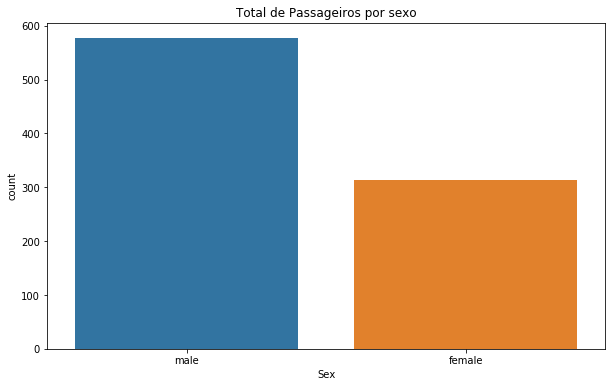

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x="Sex", data=df_treino)
plt.title("Total de Passageiros por sexo")

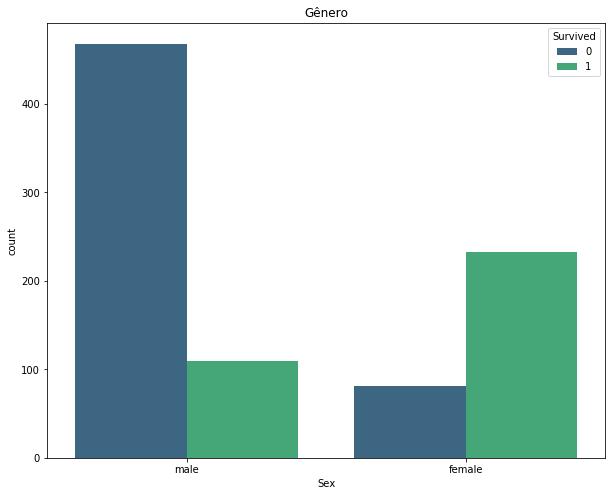

In [16]:
plt.figure(figsize = (10,8))
sns.countplot(data =df_treino, x = "Sex", hue = "Survived", palette = "viridis")
plt.title("Gênero")
plt.show()

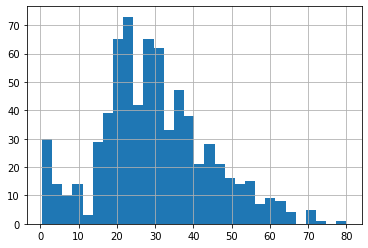

In [17]:
df_treino['Age'].hist(bins = 30)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F7E4B87F60>,
      dtype=object)

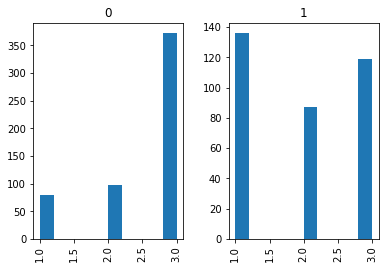

In [18]:
df_treino['Pclass'].hist(by=df_treino['Survived'])

In [19]:
df_treino.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


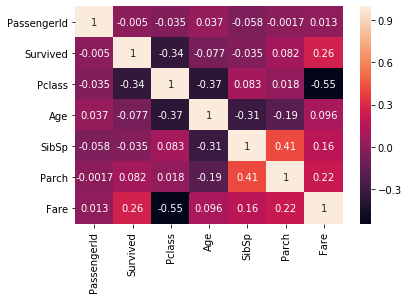

In [20]:
sns.heatmap(df_treino.corr(),vmax=1.0,  annot=True)
plt.show()

In [21]:
df_treino["Sex"] = df_treino["Sex"].map({"male":0, "female":1})

In [22]:
df_treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [23]:
#Verificando valores nulos
df_treino.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
df_treino.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
df_treino = df_treino.dropna(subset=["Age"])

In [26]:
df_treino.shape

(714, 12)

In [27]:
#Selecionando as features para o nosso modelo
X = df_treino.drop(columns=["PassengerId", "Survived", "Name", "Ticket", "Embarked", "Cabin"])
y = df_treino["Survived"]

In [28]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [29]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Dividindo os dados em treino e teste 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

### Verificando a forma dos dados

In [31]:
X_train.shape,X_test.shape

((499, 6), (215, 6))

In [32]:
y_train.shape,y_test.shape

((499,), (215,))

In [33]:
#Instanciando o objeto classificador
random_clf = RandomForestClassifier()

In [34]:
#Treinando o modelo
random_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Parâmetros do objeto RandomForestClassifier
##### n_estimators: número de árvores que serão criadas na floresta.
##### bootstrap: se será considerado o bootstrap dataset durante a criação das árvores.
##### max_features: número total de features que as árvores serão criadas.
##### criterion: medida de qualidade da divisão.
##### splitter: estratégia utilizada para dividir o nó de decisão.
##### max_depth: profundidade máxima da árvore.
##### min_samples_split: número de amostras mínimas para considerar um nó para divisão.
##### min_samples_leaf: número de amostras mínimas no nível folha. 

In [35]:
resultado = random_clf.predict(X_test)

In [36]:
resultado

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [37]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       125
           1       0.76      0.70      0.73        90

    accuracy                           0.78       215
   macro avg       0.78      0.77      0.77       215
weighted avg       0.78      0.78      0.78       215



### Verificando as features mais importantes para o modelo treinado


In [38]:
random_clf.feature_importances_

array([0.09779227, 0.22693215, 0.28273454, 0.05158198, 0.04308586,
       0.29787321])

In [39]:
feature_imp = pd.Series(random_clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

In [40]:
feature_imp

Fare      0.297873
Age       0.282735
Sex       0.226932
Pclass    0.097792
SibSp     0.051582
Parch     0.043086
dtype: float64

In [41]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()

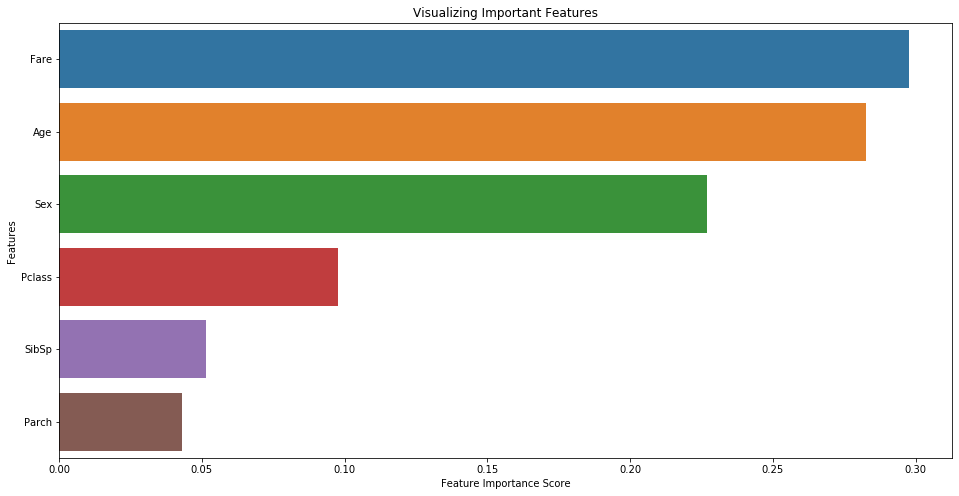

In [42]:
visualiza_features_importantes(feature_imp)

In [43]:
#Selecionando uma árvore da floresta
tree0 = random_clf.estimators_[0]

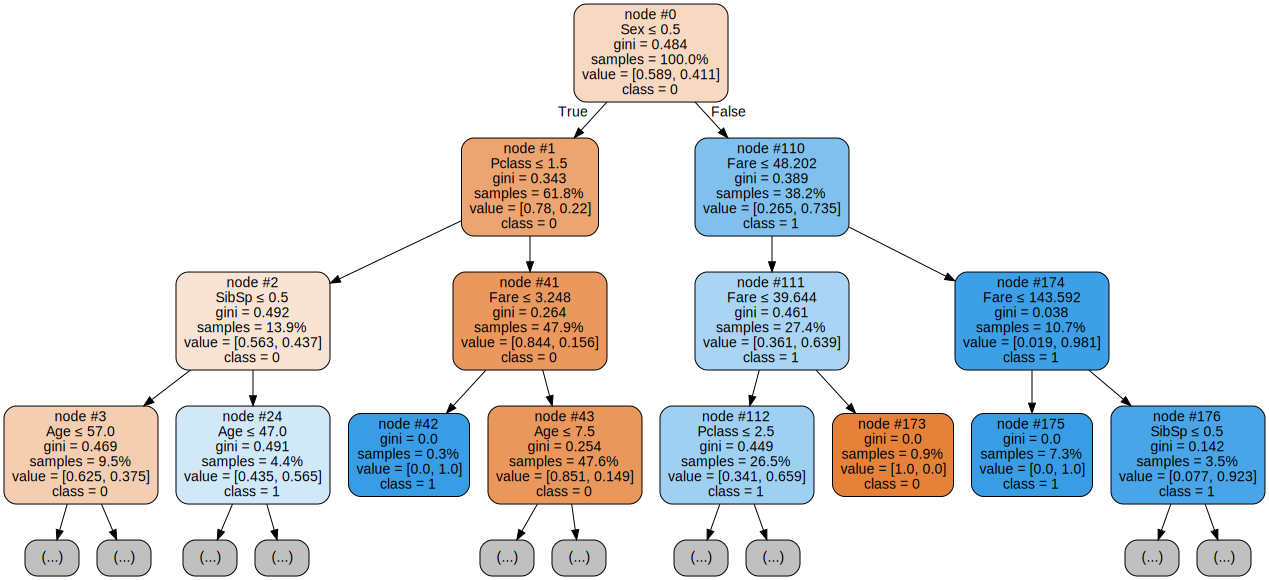

In [45]:
from sklearn.tree import export_graphviz
import graphviz 

dot_data = export_graphviz(
         tree0,
         max_depth=3,
         out_file=None,
         feature_names=X_train.columns,
         class_names=['0','1'], 
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

In [46]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare
423,3,1,28.00,1,1,14.4000
177,1,1,50.00,0,0,28.7125
305,1,0,0.92,1,2,151.5500
292,2,0,36.00,0,0,12.8750
889,1,0,26.00,0,0,30.0000
...,...,...,...,...,...,...
203,3,0,45.50,0,0,7.2250
499,3,0,24.00,0,0,7.7958
628,3,0,26.00,0,0,7.8958
879,1,1,56.00,0,1,83.1583


In [ ]:
df_treino["Pclass"].unique()

In [47]:
teste = np.array([[2,1,28,0,0,7.2250]])

In [48]:
teste

array([[ 2.   ,  1.   , 28.   ,  0.   ,  0.   ,  7.225]])

In [49]:
resultado1 = random_clf.predict(teste)

In [50]:
resultado1

array([1], dtype=int64)